In [1]:
from frozen.factor.contrib.barra import BarraCNE6

In [2]:
from frozen.basis import FrozenConfig
config = FrozenConfig()

In [3]:
barra = BarraCNE6.from_config(config)

[INFO] frozen.factor.contrib.barra [barra.py:2792]: Loading market data from database
[INFO] - 2025-08-05 11:32:07 - frozen.utils.industry - [industry.py:107]: Fetching industry mapping for sw_l1


In [18]:
barra.set_parallel_config(enable_parallel=True, max_workers=4)

In [19]:
barra_factor = barra.compute_all_factors()

[INFO] - 2025-08-05 11:38:55 - frozen.factor.contrib.barra - [barra.py:797]: Barra CNE6 Liquidity Style Factor calculation completed
[INFO] - 2025-08-05 11:38:56 - frozen.factor.contrib.barra - [barra.py:1067]: Barra CNE6 Momentum Style Factor calculation completed
[INFO] - 2025-08-05 11:39:02 - frozen.factor.contrib.barra - [barra.py:389]: Barra CNE6 Size Style Factor calculation completed
[INFO] - 2025-08-05 11:39:05 - frozen.factor.contrib.barra - [barra.py:538]: Barra CNE6 Volatility Style Factor calculation completed
[INFO] - 2025-08-05 11:39:06 - frozen.factor.contrib.barra - [barra.py:2604]: Barra CNE6 Dividend Yield Style Factor calculation completed
[INFO] - 2025-08-05 11:39:17 - frozen.factor.contrib.barra - [barra.py:2141]: Barra CNE6 Value Style Factor calculation completed
[INFO] - 2025-08-05 11:39:19 - frozen.factor.contrib.barra - [barra.py:2440]: Barra CNE6 Growth Style Factor calculation completed
[INFO] - 2025-08-05 11:39:29 - frozen.factor.contrib.barra - [barra.py:1

In [6]:
barra.get_factor_hierarchy()

{'Size': {'Size': {'LNCAP': <frozen.factor.expression.base.Factor at 0x14d046610>},
  'Mid cap': {'MIDCAP': <frozen.factor.expression.base.Factor at 0x15fff8090>}},
 'Volatility': {'Beta': {'HBETA': <frozen.factor.expression.base.Factor at 0x16f3500d0>},
  'Residual Volatility': {'HSIGMA': <frozen.factor.expression.base.Factor at 0x14d0445d0>,
   'DASTD': <frozen.factor.expression.base.Factor at 0x17378a790>,
   'CMRA': <frozen.factor.expression.base.Factor at 0x1707367d0>}},
 'Liquidity': {'Liquidity': {'STOM': <frozen.factor.expression.base.Factor at 0x1797dabd0>,
   'STOQ': <frozen.factor.expression.base.Factor at 0x1b953c3d0>,
   'STOA': <frozen.factor.expression.base.Factor at 0x17c7b1d50>,
   'ATVR': <frozen.factor.expression.base.Factor at 0x1bb727050>}},
 'Momentum': {'Short Term reversal': {'STREV': <frozen.factor.expression.base.Factor at 0x1bbe95910>},
  'Seasonality': {'SEASON': <frozen.factor.expression.base.Factor at 0x177d8e250>},
  'Industry Momentum': {'INDMOM': <froze

In [7]:
barra_factor

{'DividendYield': <frozen.factor.expression.base.Factor at 0x17c7b1190>,
 'Liquidity': <frozen.factor.expression.base.Factor at 0x150a01410>,
 'Growth': <frozen.factor.expression.base.Factor at 0x1516d0bd0>,
 'Size': <frozen.factor.expression.base.Factor at 0x179567090>,
 'Quality': <frozen.factor.expression.base.Factor at 0x176514650>,
 'Momentum': <frozen.factor.expression.base.Factor at 0x14d052c50>,
 'Value': <frozen.factor.expression.base.Factor at 0x1b953dd50>,
 'Volatility': <frozen.factor.expression.base.Factor at 0x14d047a10>,
 'Size_LNCAP': <frozen.factor.expression.base.Factor at 0x14d046610>,
 'Size_MIDCAP': <frozen.factor.expression.base.Factor at 0x15fff8090>,
 'Volatility_DASTD': <frozen.factor.expression.base.Factor at 0x17378a790>,
 'Volatility_CMRA': <frozen.factor.expression.base.Factor at 0x1707367d0>,
 'Volatility_HBETA': <frozen.factor.expression.base.Factor at 0x16f3500d0>,
 'Volatility_HSIGMA': <frozen.factor.expression.base.Factor at 0x14d0445d0>,
 'Liquidity_S

In [8]:
from frozen.utils.plotting import AlphaPlot

In [9]:
aplot = AlphaPlot(config=config)

In [10]:
from frozen.utils import Universe
pool = Universe(config).pool

In [11]:
from frozen.data.etl.dataload import DataLoadManager, DatabaseTypes
dataloader = DataLoadManager(database_type_or_config=DatabaseTypes.DUCKDB)

In [12]:
prices = dataloader.load_volume_price('stock_daily_hfq', 'close', pool, start_date="20150101", end_date="20230101")

In [13]:
aplot.set_alpha(barra_factor["Size"])
aplot.set_prices(prices)

In [14]:
aplot.factor_net_value()

trade_date
2015-01-05    1.000000
2015-01-06    0.997639
2015-01-07    0.999130
2015-01-08    0.985119
2015-01-09    0.985084
                ...   
2022-12-26    1.297980
2022-12-27    1.301634
2022-12-28    1.306864
2022-12-29    1.302083
2022-12-30    1.303741
Length: 1947, dtype: float64

In [15]:
target_factors = ["Size", "Volatility", "Liquidity", "Momentum", "Growth", "Quality", "Value", "DividendYield"]

temp = {}
for factor in target_factors:
    temp[factor] = barra_factor[factor]

<Axes: >

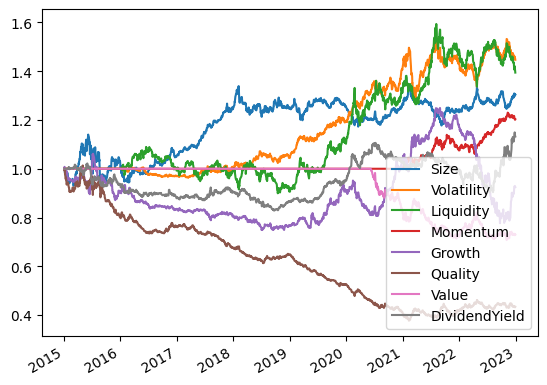

In [16]:
aplot.factor_net_value_by_batch(factors=temp).plot()